In [4]:
import pandas as pd
import numpy as np
from benchmarks import *
import glob
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# for each of the programs/prob sizes in the explorData directory,
# load up all their CSV data

os.chdir(ROOT_DIR+'/explorData')

# extract the names and problem sizes of the done codes
dirs = list(os.listdir())

doneRuns = {}

for dir in dirs:
	progname = dir.split('-')[0]
	probsize = dir.split('-')[1]

	allJobs = glob.glob('./'+dir+'/allUniquePointsToSample.csv')[0]
	doneFiles = glob.glob('./'+dir+'/*/complete.csv')

	allData = pd.read_csv(allJobs)

	doneData = pd.DataFrame(columns=['xtime']+list(allData.columns))

	# join all the done files into one csv
	for doneFile in doneFiles:
		comp = pd.read_csv(doneFile)
		doneData = pd.concat([doneData, comp], ignore_index=True)

	doneData = doneData.reset_index(drop=True)

	# we remove this line just to get the plots up
	doneData = doneData[doneData['xtime'] != -1.0]

	# if we have all the data, let's analyze it
	if doneData.shape[0] == allData.shape[0]:
		print(progname, probsize, end='\t')
		print(doneData.shape, allData.shape)
		doneRuns[dir] = {'progname':progname, 'probsize': probsize, 'df':doneData}
	else:
		print('\t', progname, probsize, end='\t')
		print('incomplete data! Need to re-run', doneData.shape[0], allData.shape[0])





	 bt_nas smlprob	incomplete data! Need to re-run 801 1320
cg_nas smlprob	(1320, 6) (1320, 5)
ft_nas smlprob	(1320, 6) (1320, 5)
bfs_rodinia smlprob	(1320, 6) (1320, 5)
	 hpcg smlprob	incomplete data! Need to re-run 812 1320
lulesh smlprob	(1320, 6) (1320, 5)
cfd_rodinia smlprob	(1320, 6) (1320, 5)
	 bt_nas medprob	incomplete data! Need to re-run 1254 1320
cg_nas medprob	(1320, 6) (1320, 5)
ft_nas medprob	(1320, 6) (1320, 5)
bfs_rodinia medprob	(1320, 6) (1320, 5)
	 hpcg medprob	incomplete data! Need to re-run 792 1320
lulesh medprob	(1320, 6) (1320, 5)
cfd_rodinia medprob	(1320, 6) (1320, 5)
	 bt_nas lrgprob	incomplete data! Need to re-run 679 1320
cg_nas lrgprob	(1320, 6) (1320, 5)
ft_nas lrgprob	(1320, 6) (1320, 5)
	 bfs_rodinia lrgprob	incomplete data! Need to re-run 64 1320
	 hpcg lrgprob	incomplete data! Need to re-run 933 1320
lulesh lrgprob	(1320, 6) (1320, 5)
cfd_rodinia lrgprob	(1320, 6) (1320, 5)


cg_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
410              112         close       static  1.206667
234               56         close       static  1.226667
256               56        spread       static  1.236667
436              112        spread    static,32  1.276667
438              112        spread    static,64  1.280000
416              112         close    static,64  1.283333
414              112         close    static,32  1.283333
432              112        spread       static  1.303333
344               84        spread       static  1.303333
412              112         close   static,128  1.320000


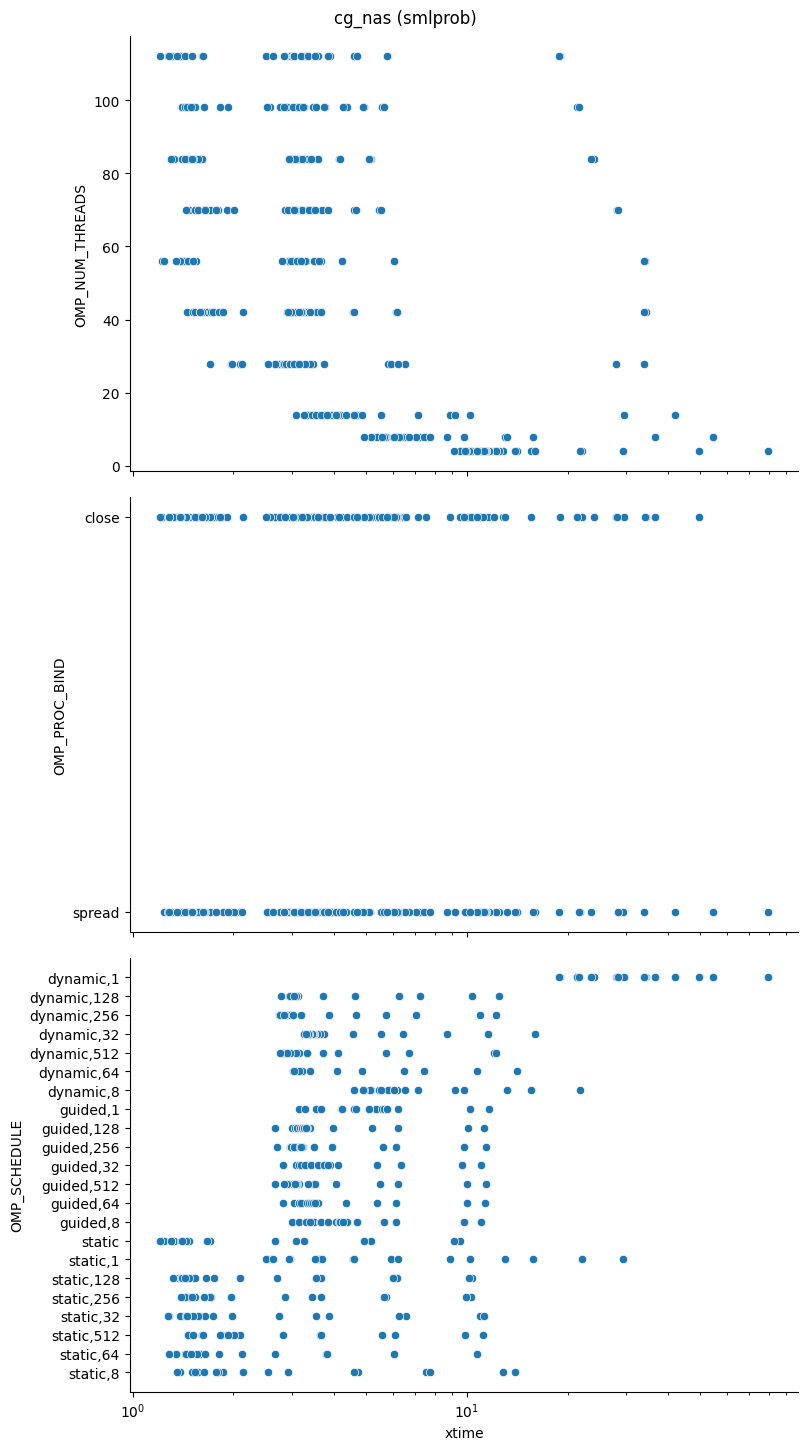

ft_nas smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
256               56        spread       static  0.950000
257               56        spread     static,1  0.960000
234               56         close       static  0.960000
235               56         close     static,1  0.963333
212               42        spread       static  1.090000
213               42        spread     static,1  1.100000
432              112        spread       static  1.130000
249               56        spread     guided,1  1.130000
410              112         close       static  1.143333
433              112        spread     static,1  1.150000


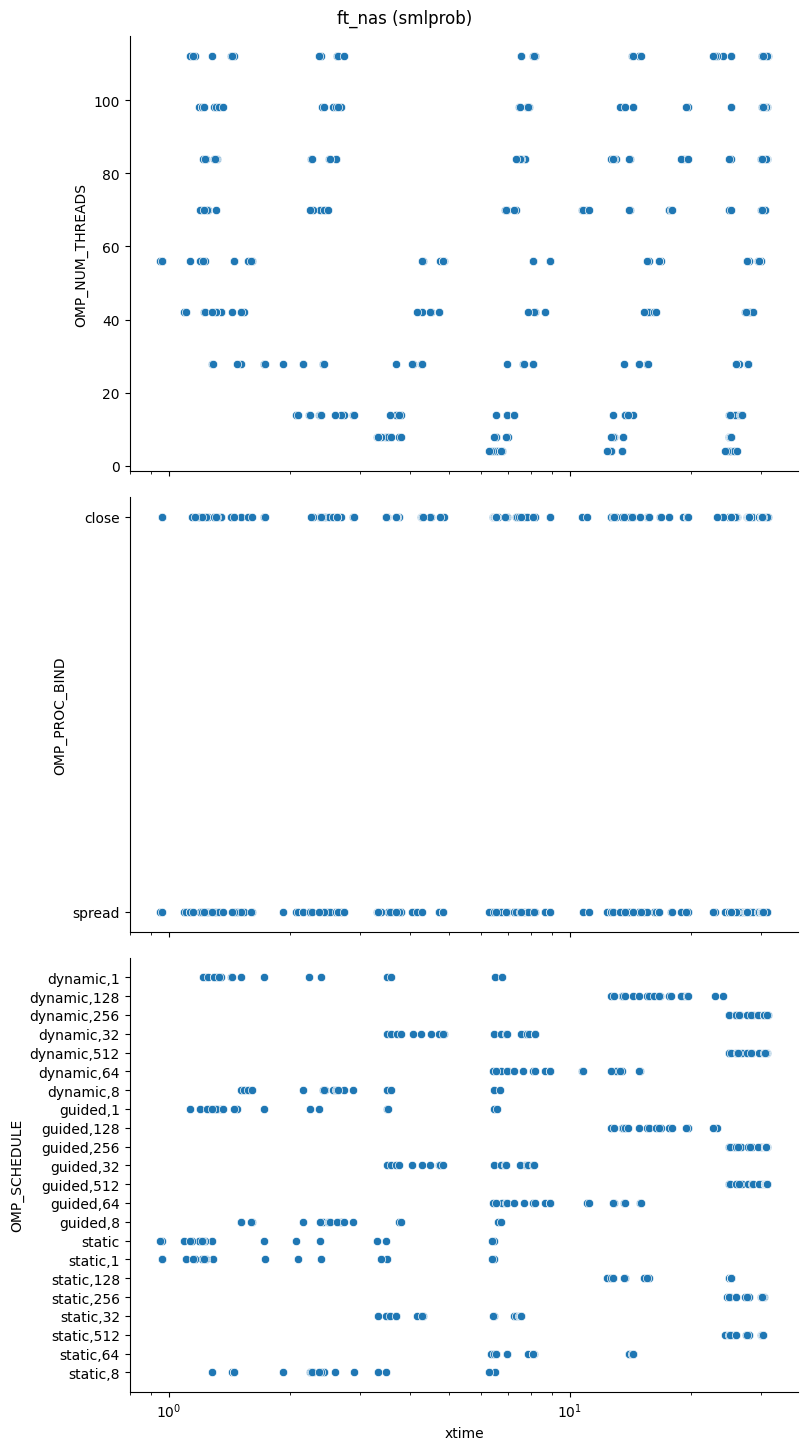

bfs_rodinia smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
262               56        spread    static,64  0.006739
221               56         close  dynamic,128  0.008733
250               56        spread   guided,128  0.008768
257               56        spread     static,1  0.009201
260               56        spread    static,32  0.009249
232               56         close    guided,64  0.009394
261               56        spread   static,512  0.010082
238               56         close    static,32  0.010134
199               42        spread  dynamic,128  0.010266
263               56        spread     static,8  0.010501


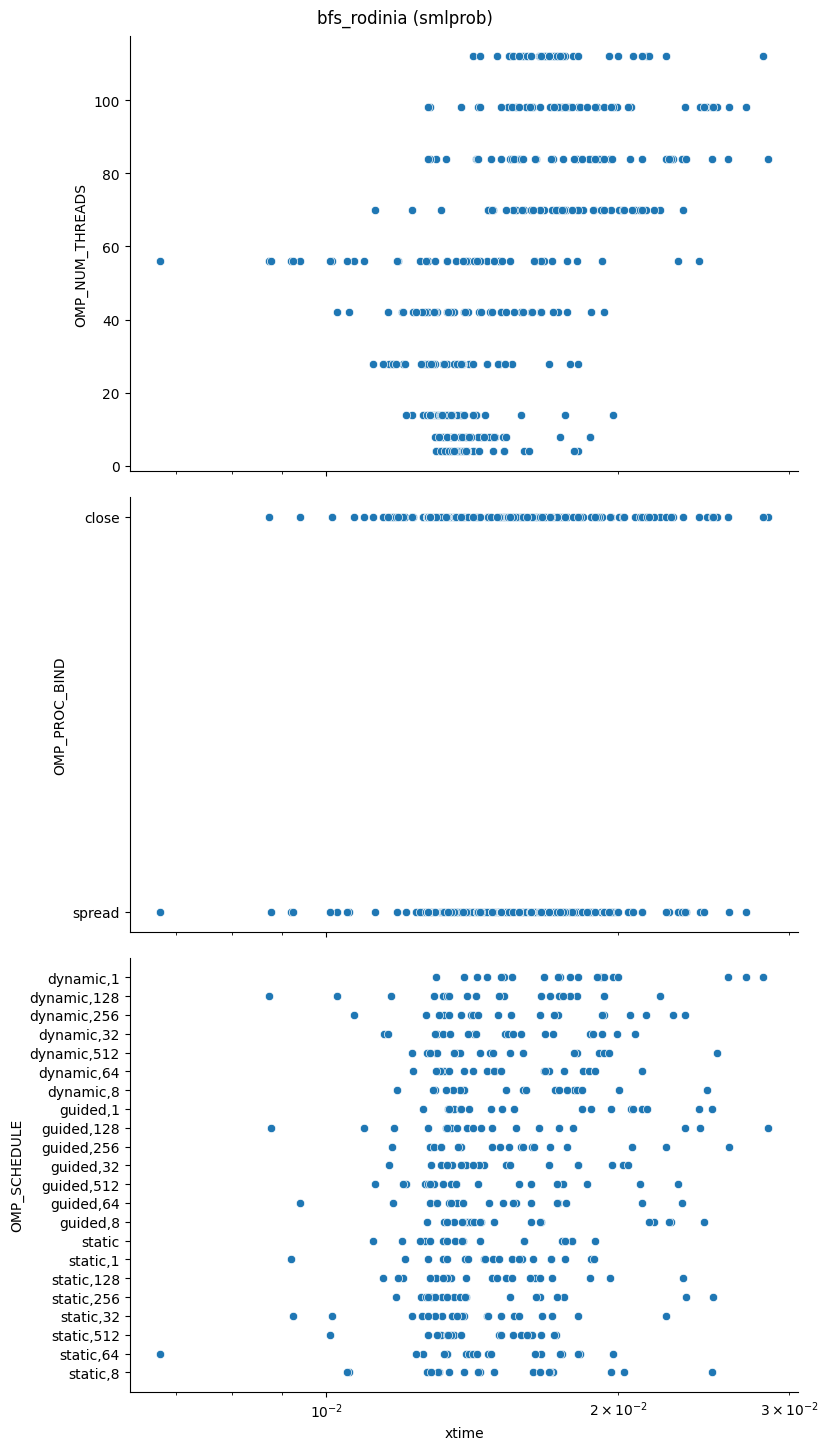

hpcg smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
99                14         close    static,32  0.160636
52                 8         close       static  0.161670
44                 8         close  dynamic,512  0.162050
95                14         close       static  0.163003
296               84         close   guided,512  0.163153
284               70        spread     static,8  0.163287
19                 4         close     static,8  0.163491
100               14         close   static,512  0.163648
54                 8         close   static,128  0.163991
115               14        spread       static  0.164201


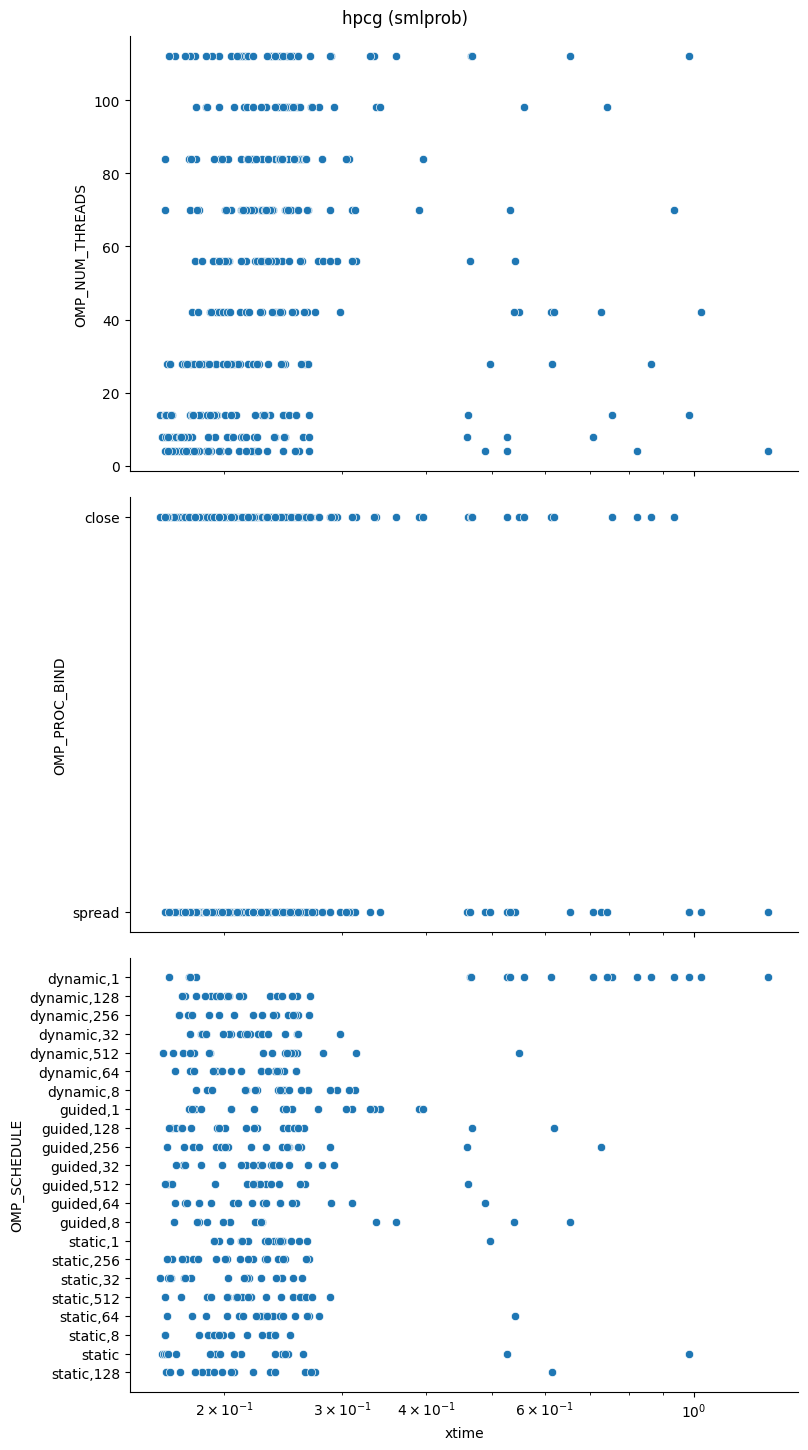

lulesh smlprob
    OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
14                4         close       static  4.981227
19                4         close   static,512  5.026782
17                4         close   static,256  5.087356
9                 4         close   guided,256  5.116062
4                 4         close  dynamic,512  5.184261
11                4         close   guided,512  5.186772
16                4         close   static,128  5.285736
2                 4         close  dynamic,256  5.328918
58                8         close       static  5.477042
61                8         close   static,256  5.486757


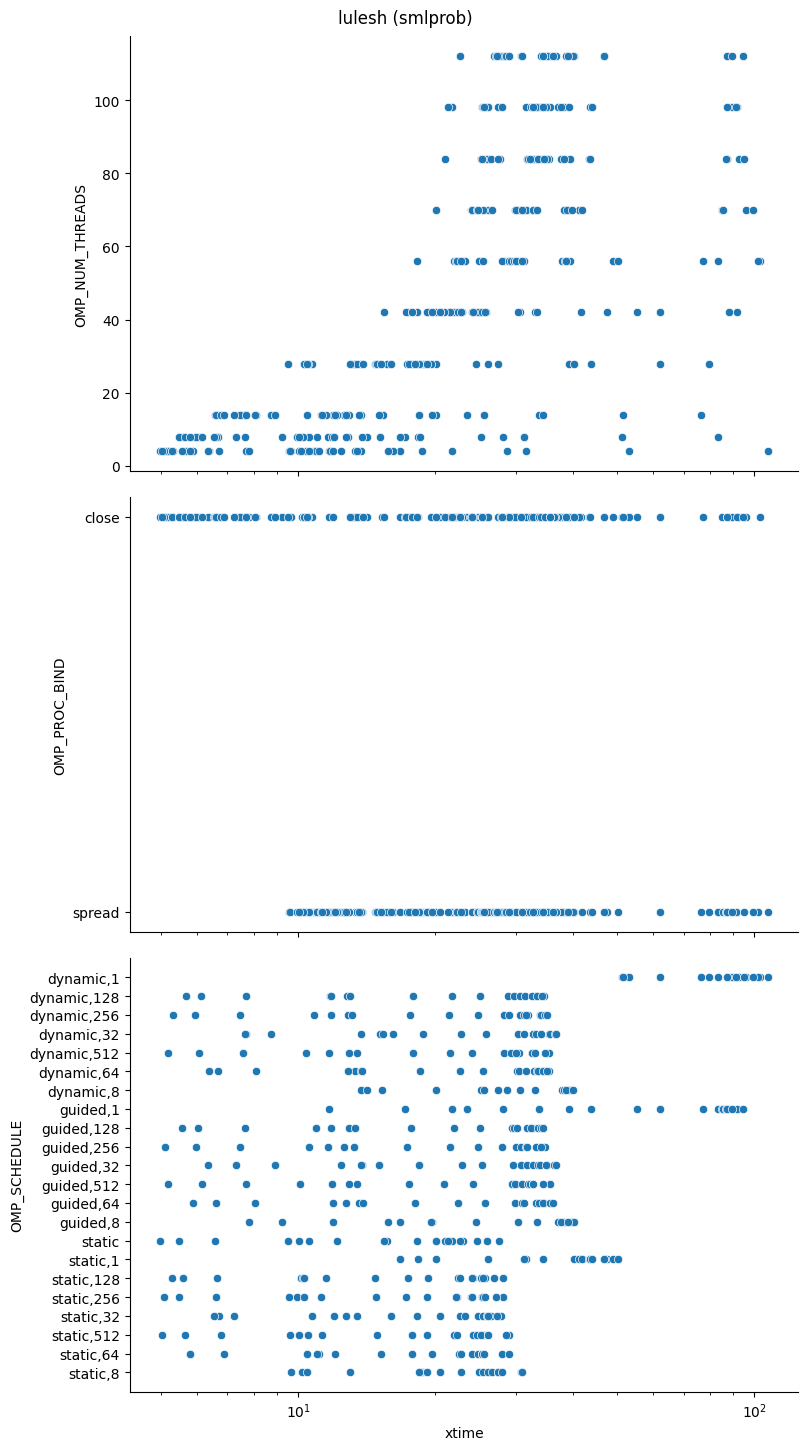

cfd_rodinia smlprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
410              112         close       static  1.697377
432              112        spread       static  1.703790
388               98        spread       static  1.833000
366               98         close       static  1.853270
234               56         close       static  1.890070
256               56        spread       static  1.891103
322               84         close       static  2.089350
417              112         close     static,8  2.092260
344               84        spread       static  2.095750
439              112        spread     static,8  2.098533


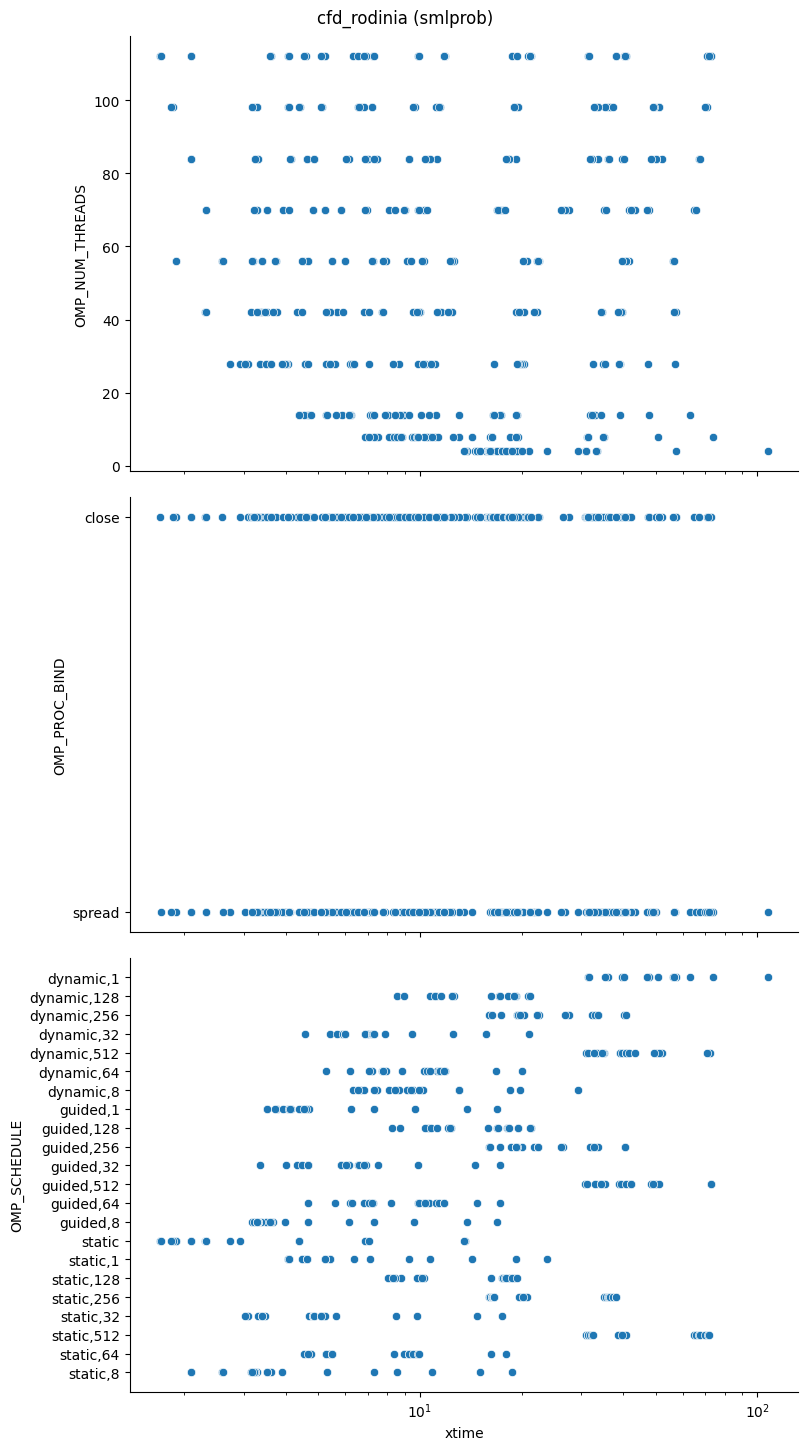

cg_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
432              112        spread       static  4.760000
438              112        spread    static,64  4.953333
410              112         close       static  4.973333
436              112        spread    static,32  4.990000
414              112         close    static,32  5.000000
416              112         close    static,64  5.006667
434              112        spread   static,128  5.033333
417              112         close     static,8  5.156667
439              112        spread     static,8  5.176667
412              112         close   static,128  5.176667


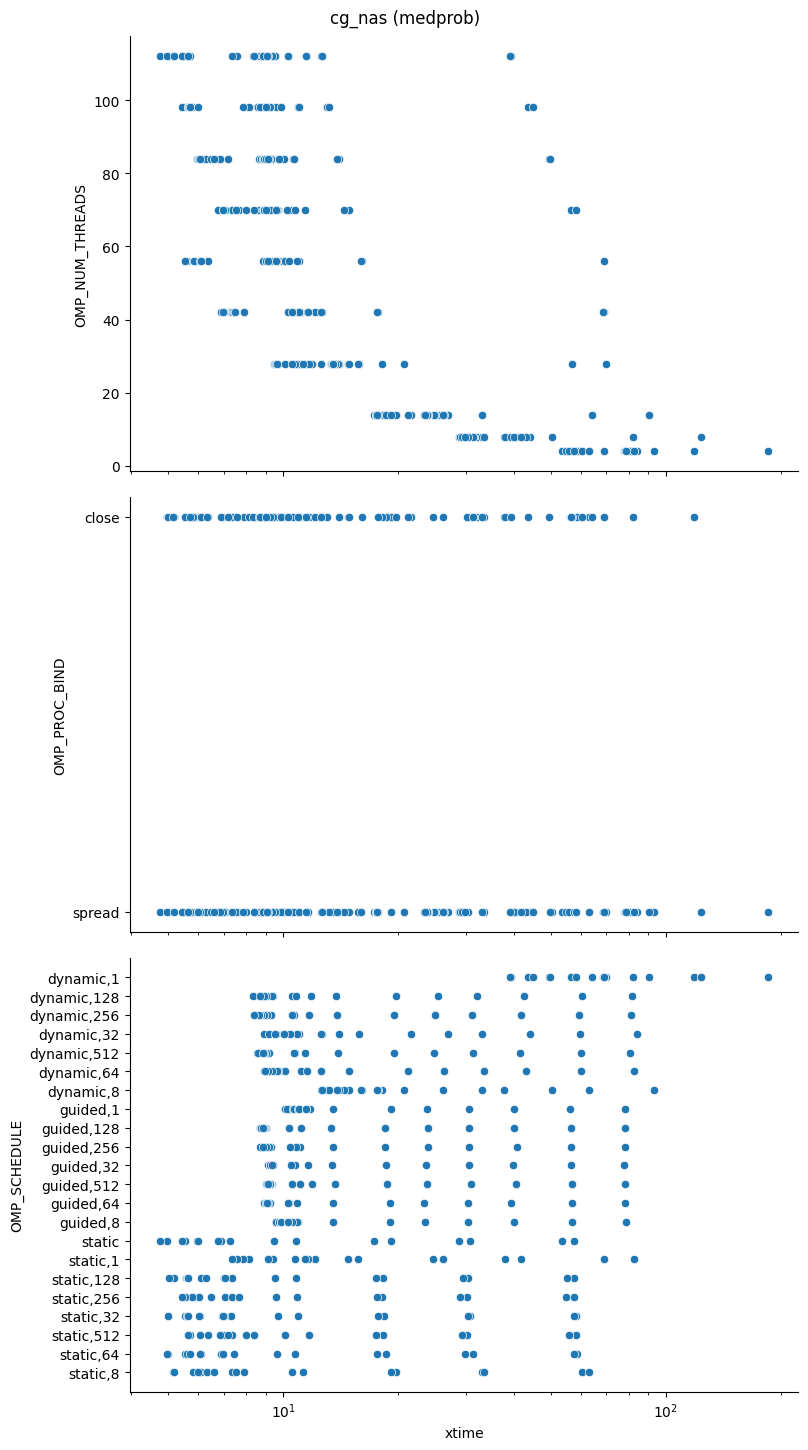

ft_nas medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
234               56         close       static  3.896667
256               56        spread       static  3.936667
235               56         close     static,1  4.043333
257               56        spread     static,1  4.080000
212               42        spread       static  4.506667
432              112        spread       static  4.610000
213               42        spread     static,1  4.616667
433              112        spread     static,1  4.773333
410              112         close       static  4.803333
344               84        spread       static  4.846667


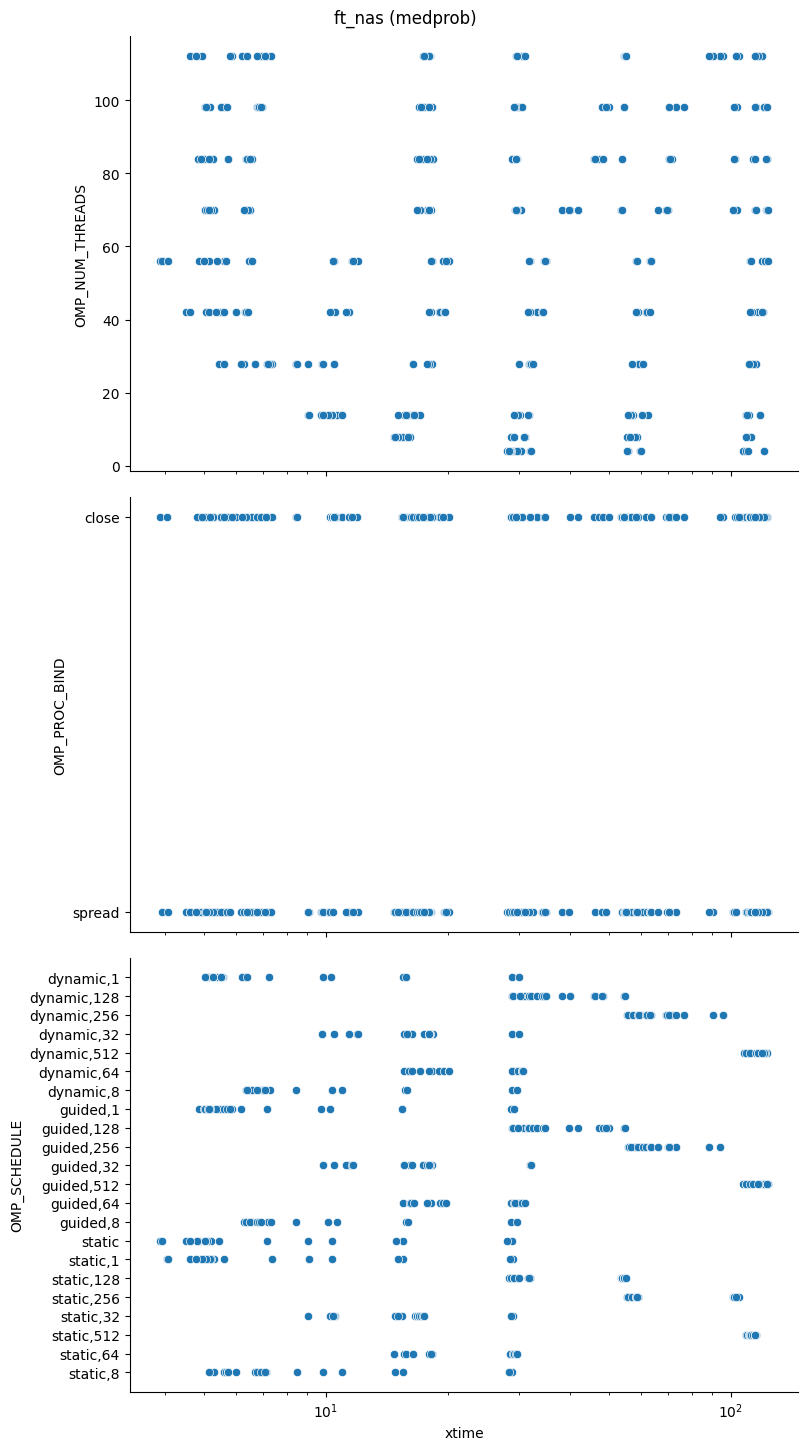

bfs_rodinia medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
51                 8         close     guided,1  0.014296
14                 4         close       static  0.014317
107               14         close   static,512  0.014349
54                 8         close    guided,32  0.014356
57                 8         close     guided,8  0.014366
63                 8         close   static,512  0.014370
105               14         close   static,256  0.014459
58                 8         close       static  0.014506
11                 4         close   guided,512  0.014520
10                 4         close    guided,32  0.014542


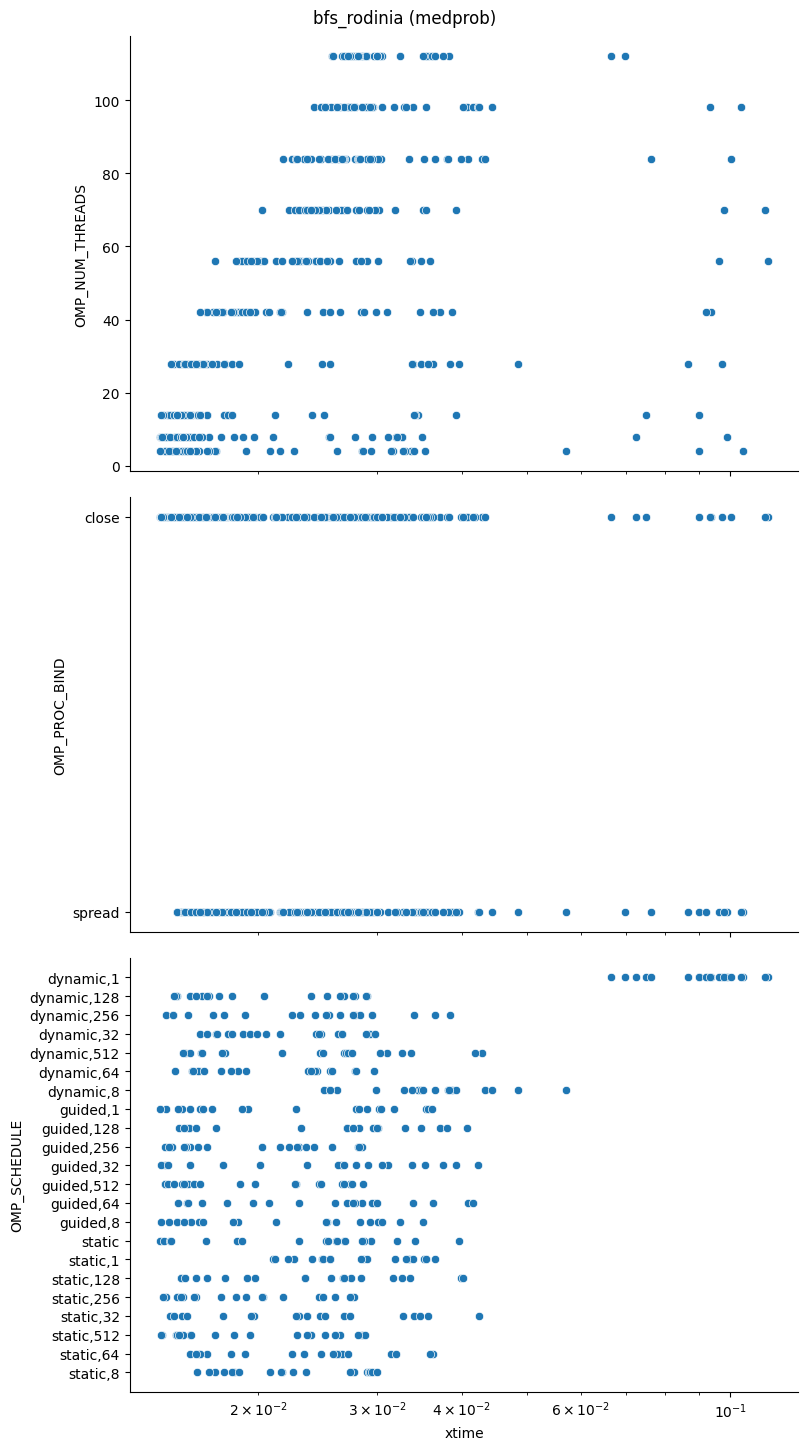

hpcg medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
46                 8         close   guided,128  17.554833
356               98        spread   static,512  17.657400
94                14         close   static,256  17.669750
8                  4         close   guided,256  17.742100
91                14         close    guided,64  17.795700
93                14         close   static,128  17.797300
97                14         close    static,64  17.829800
50                 8         close    guided,64  17.849000
145               28        spread   guided,128  17.857700
29                 4        spread    guided,64  17.857700


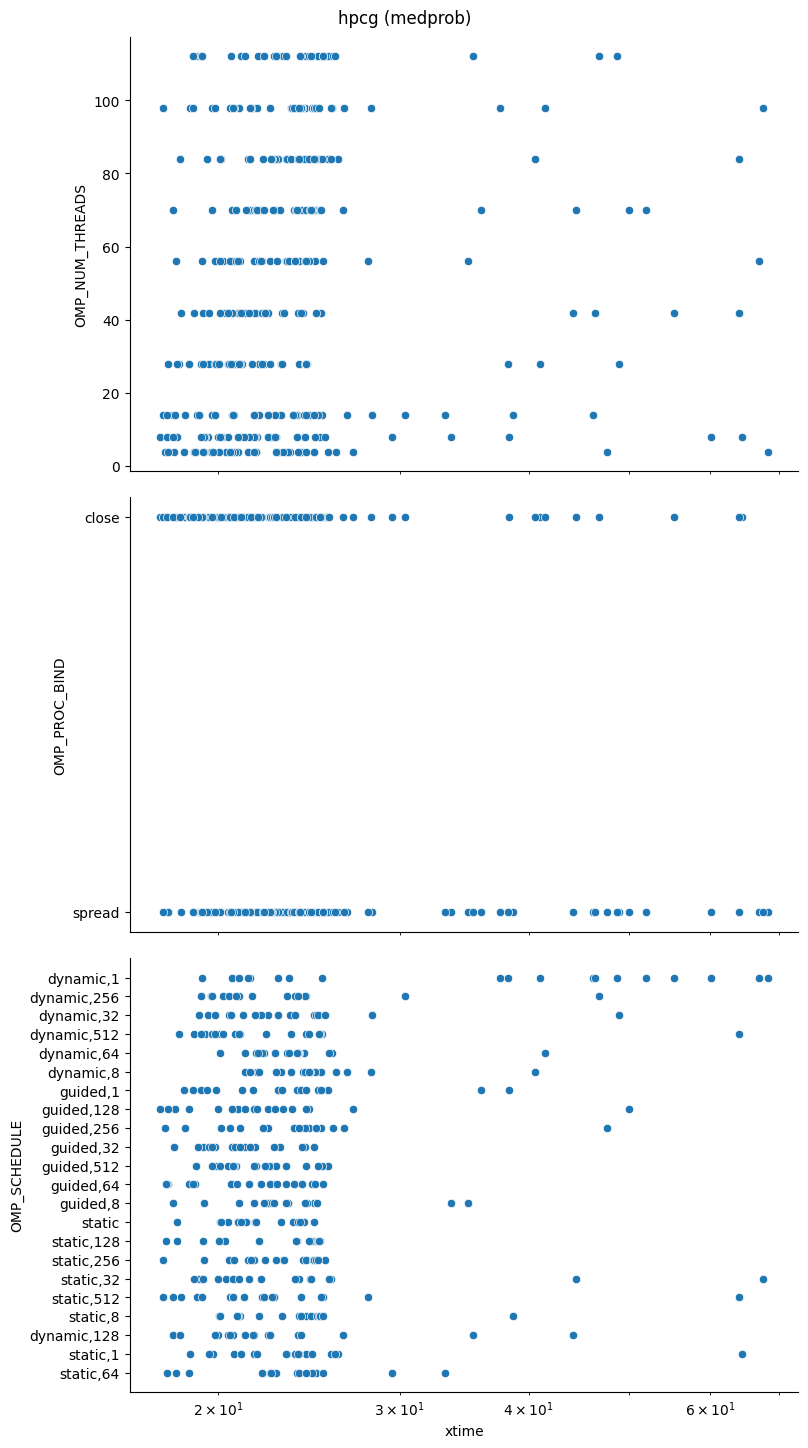

lulesh medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
102               14         close       static  10.193142
58                 8         close       static  10.511789
105               14         close   static,256  10.958084
104               14         close   static,128  11.275574
61                 8         close   static,256  11.491772
63                 8         close   static,512  11.515797
107               14         close   static,512  11.642687
53                 8         close   guided,256  11.993605
108               14         close    static,64  12.011841
55                 8         close   guided,512  12.054593


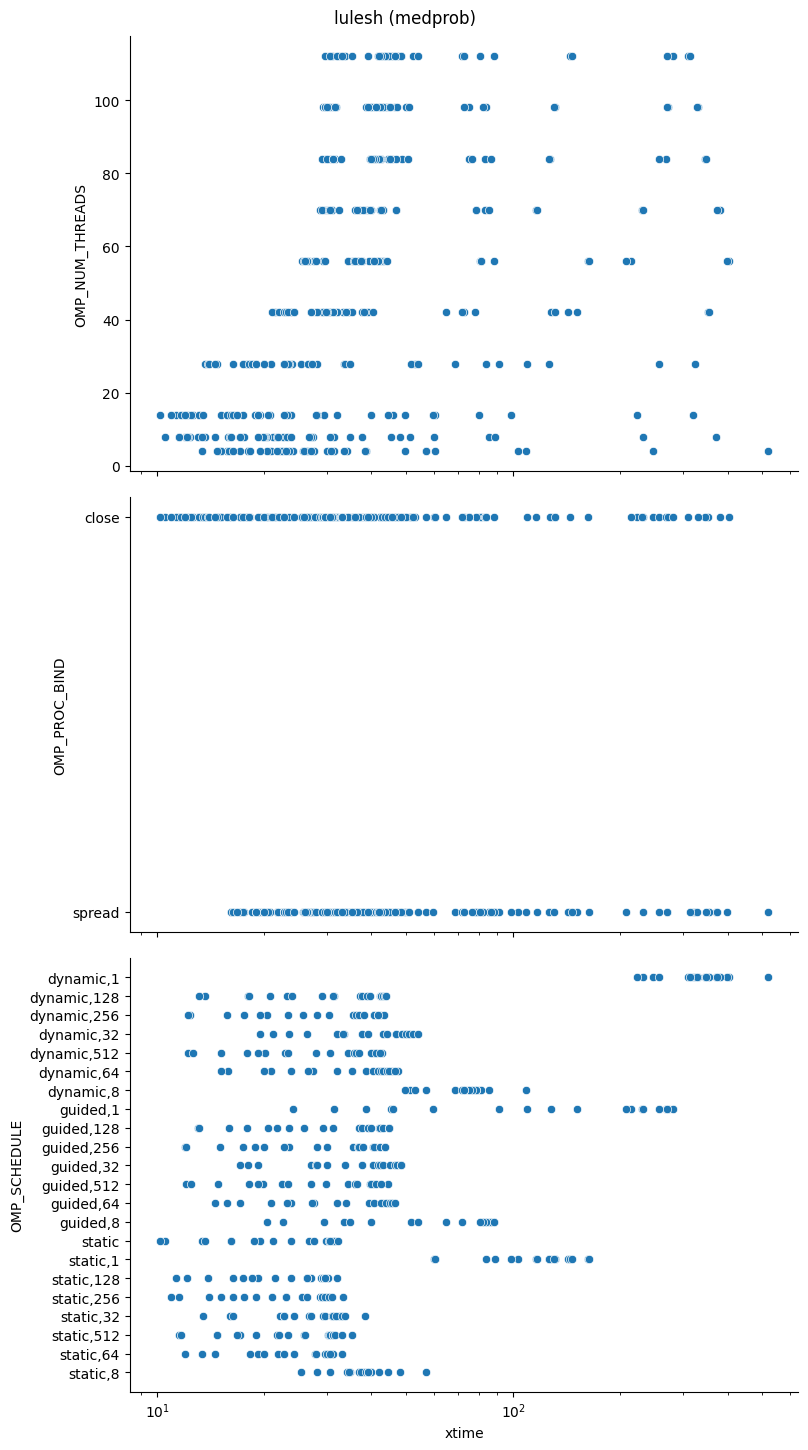

cfd_rodinia medprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
146               28         close       static  0.128457
102               14         close       static  0.146831
168               28        spread       static  0.165529
190               42         close       static  0.169404
212               42        spread       static  0.173179
58                 8         close       static  0.181011
234               56         close       static  0.183839
256               56        spread       static  0.188078
124               14        spread       static  0.192995
388               98        spread       static  0.208526


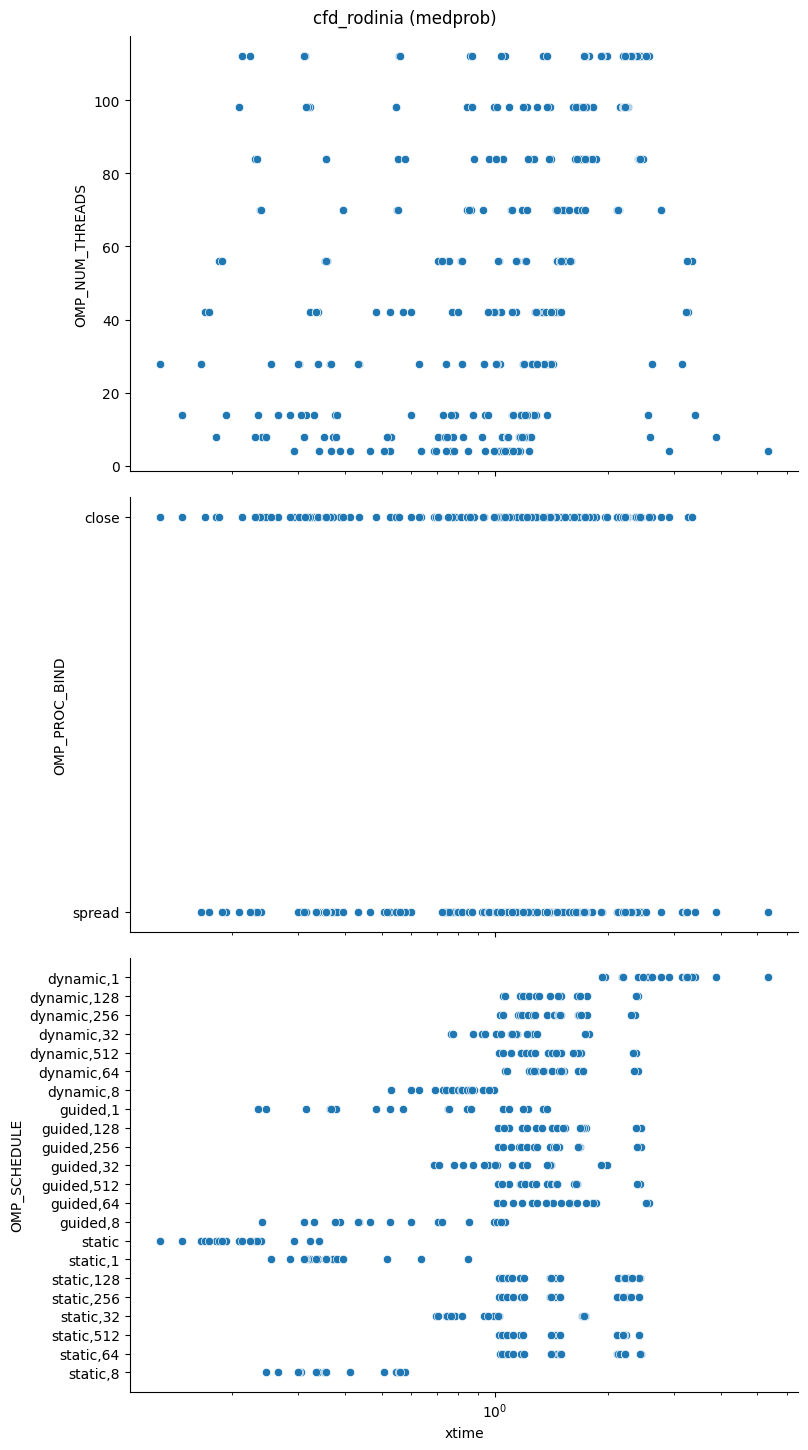

cg_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
413              112         close   static,256  175.750000
414              112         close    static,32  177.240000
432              112        spread       static  177.563333
435              112        spread   static,256  177.680000
410              112         close       static  177.696667
412              112         close   static,128  177.810000
434              112        spread   static,128  177.906667
438              112        spread    static,64  178.813333
415              112         close   static,512  179.063333
436              112        spread    static,32  179.373333


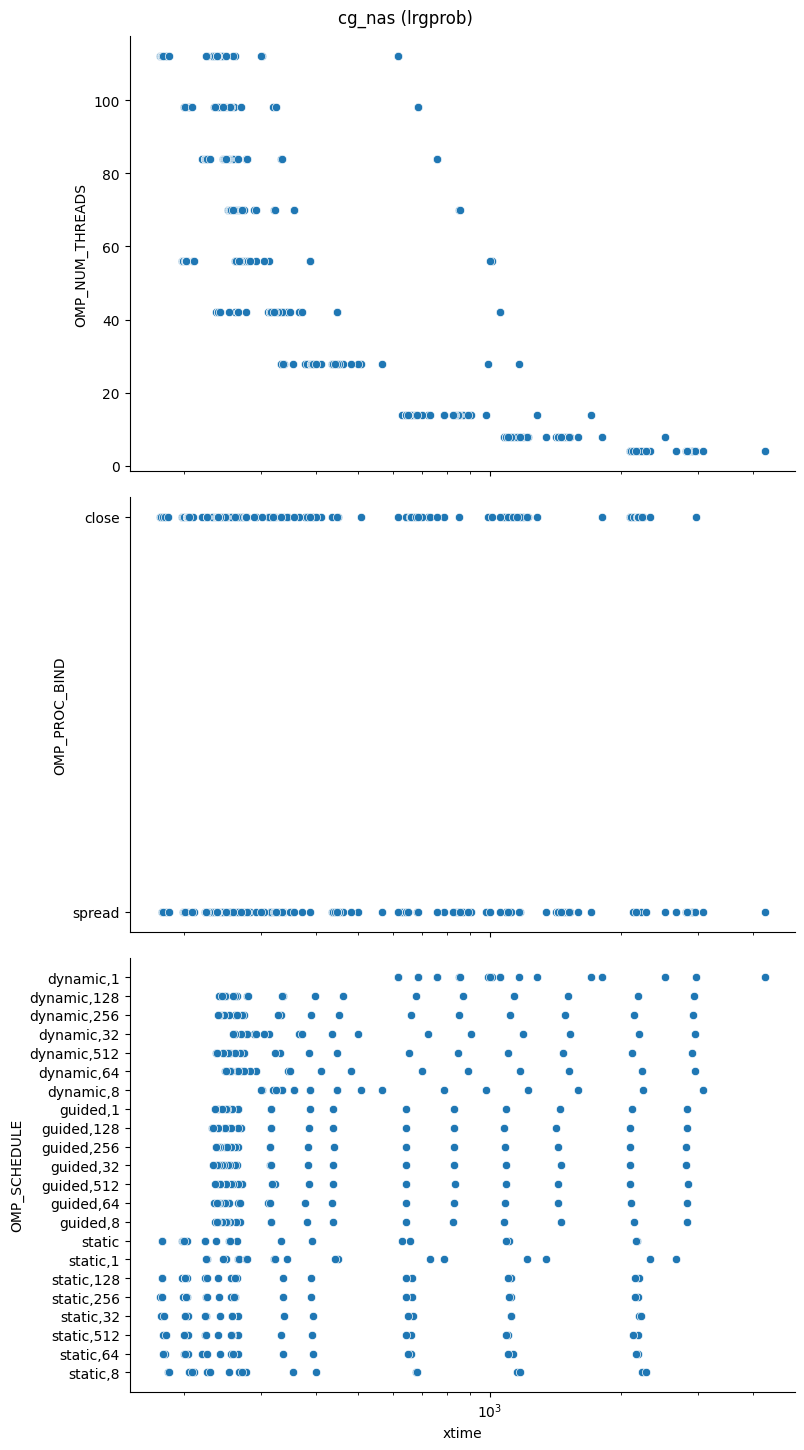

ft_nas lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE       xtime
212               42        spread       static  140.266667
213               42        spread     static,1  140.703333
205               42        spread     guided,1  152.376667
198               42        spread    dynamic,1  154.223333
211               42        spread     guided,8  154.943333
169               28        spread     static,1  155.530000
168               28        spread       static  157.756667
235               56         close     static,1  160.613333
176               42         close    dynamic,1  161.856667
219               42        spread     static,8  162.493333


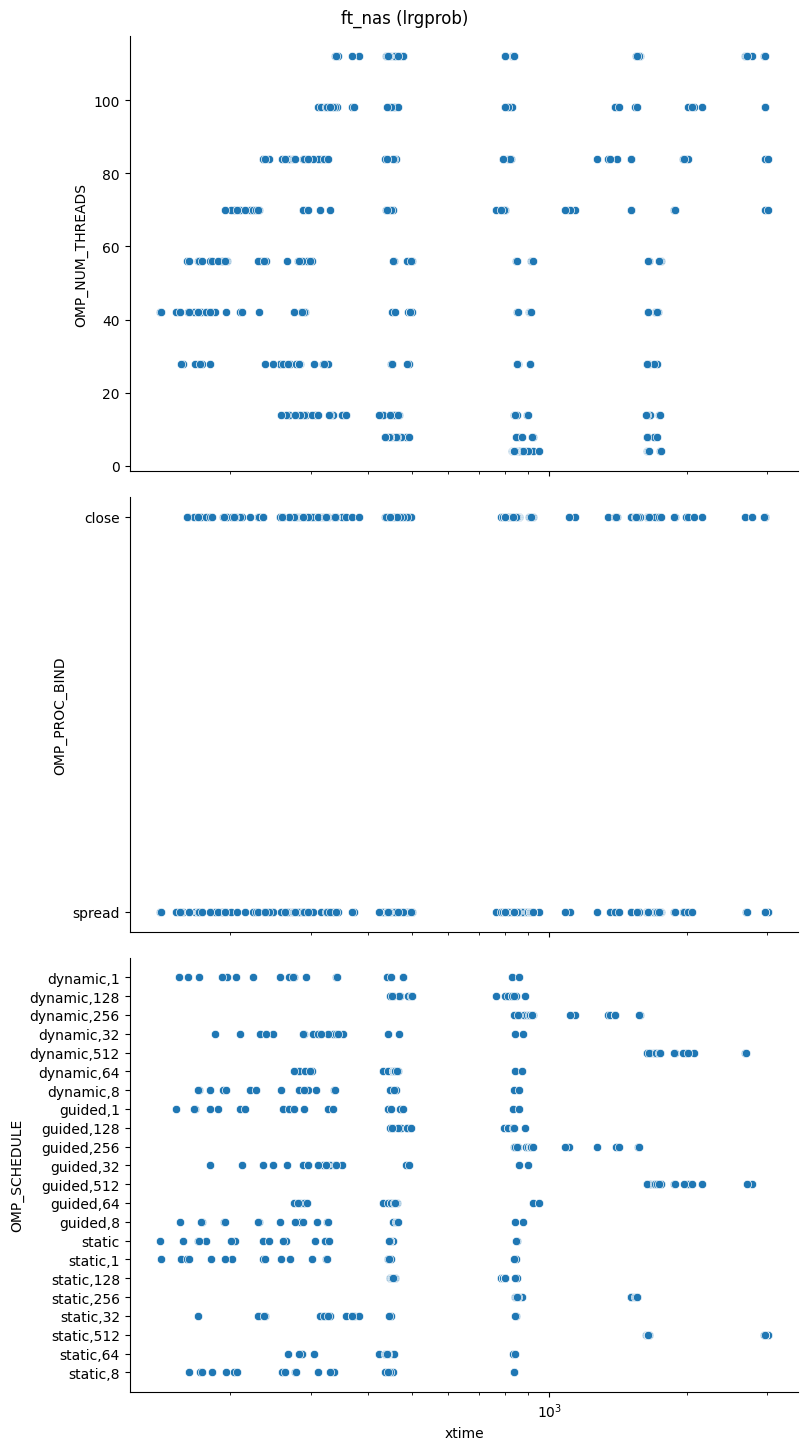

bfs_rodinia lrgprob
Empty DataFrame
Columns: [OMP_NUM_THREADS, OMP_PROC_BIND, OMP_SCHEDULE, xtime]
Index: []


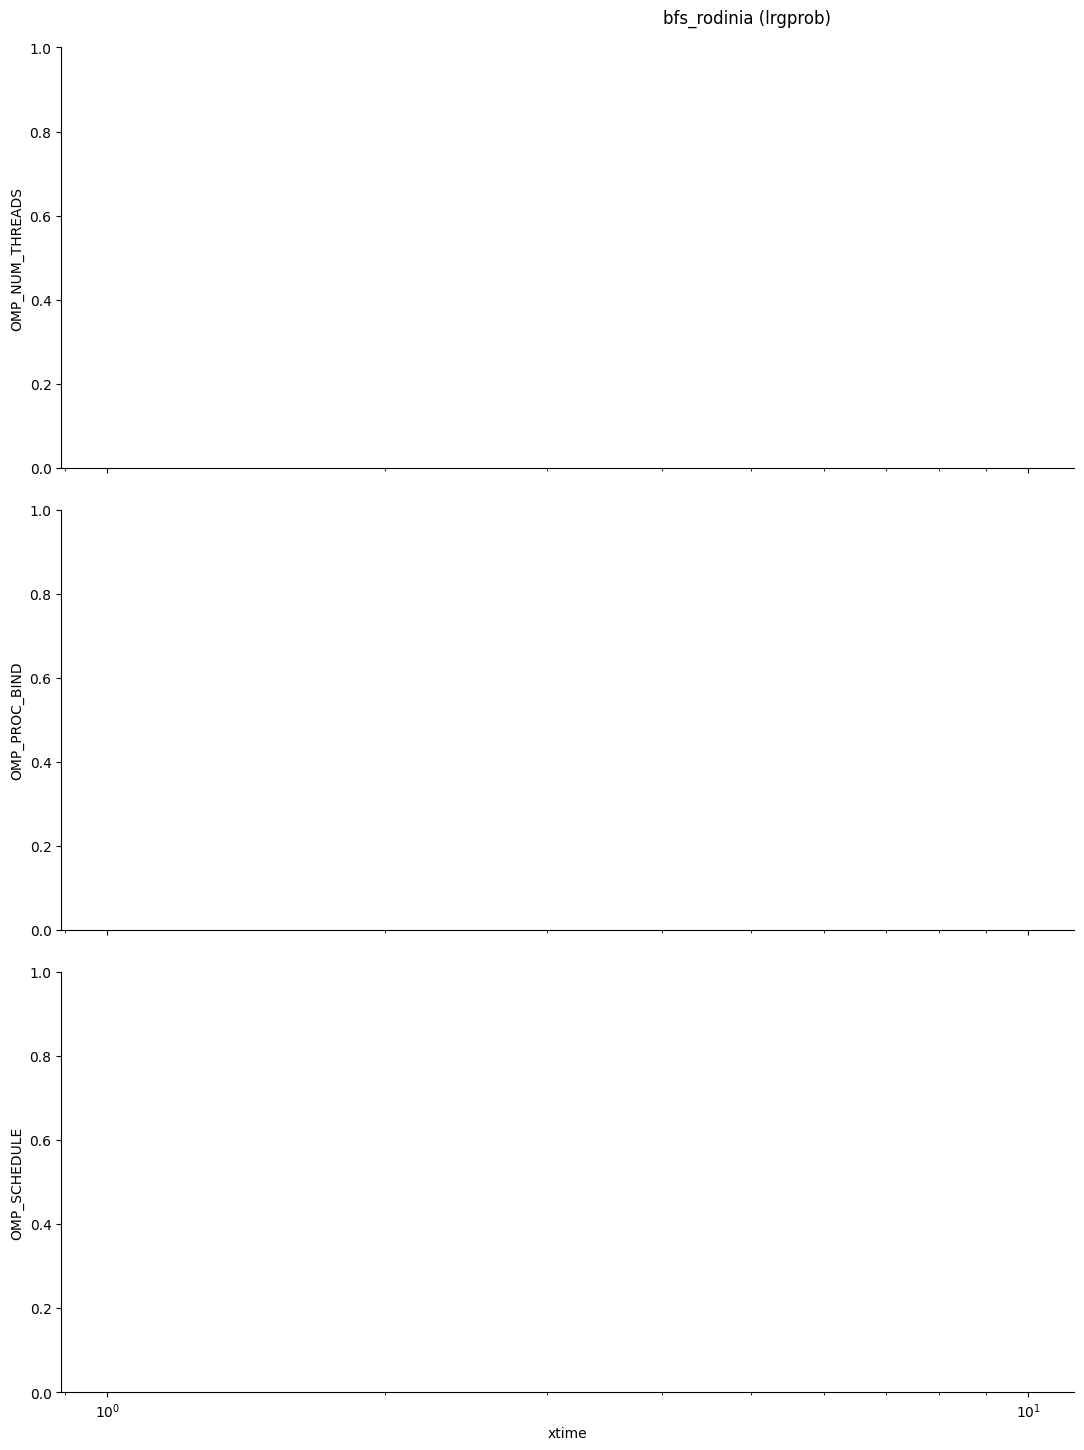

hpcg lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE    xtime
63                 8         close   static,512  64.4627
55                 8         close   guided,512  65.4803
90                14         close  dynamic,256  65.7769
144               28         close   static,128  66.2186
97                14         close   guided,256  66.2498
131               28         close  dynamic,256  66.3642
136               28         close   guided,128  66.4292
417              112        spread   guided,512  66.5138
98                14         close    guided,32  66.6509
134               28         close    dynamic,8  66.7229


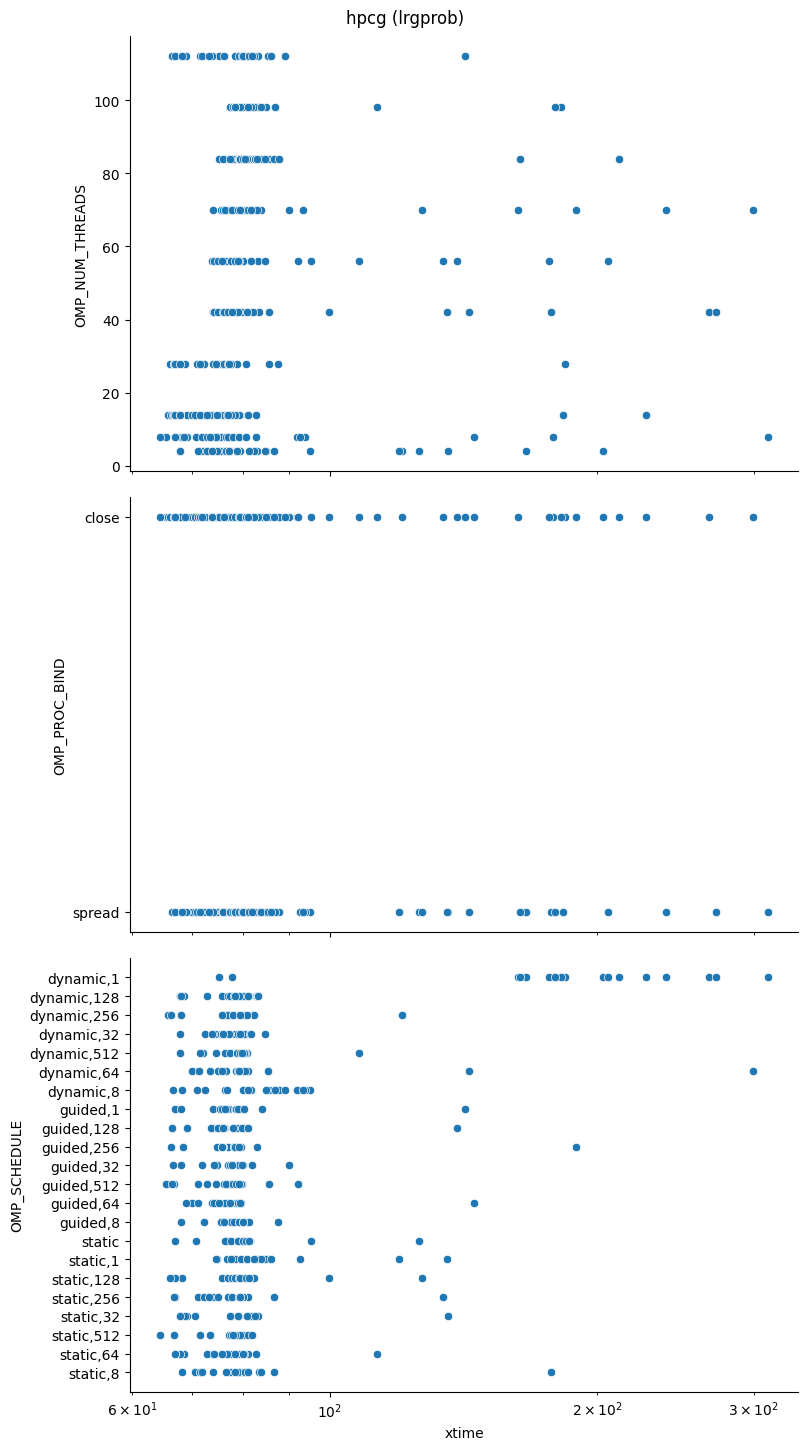

lulesh lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE      xtime
102               14         close       static  18.575551
146               28         close       static  19.650885
107               14         close   static,512  20.068723
105               14         close   static,256  20.567248
99                14         close   guided,512  21.222067
151               28         close   static,512  21.293778
149               28         close   static,256  21.354707
148               28         close   static,128  21.567764
92                14         close  dynamic,512  21.694771
104               14         close   static,128  22.141684


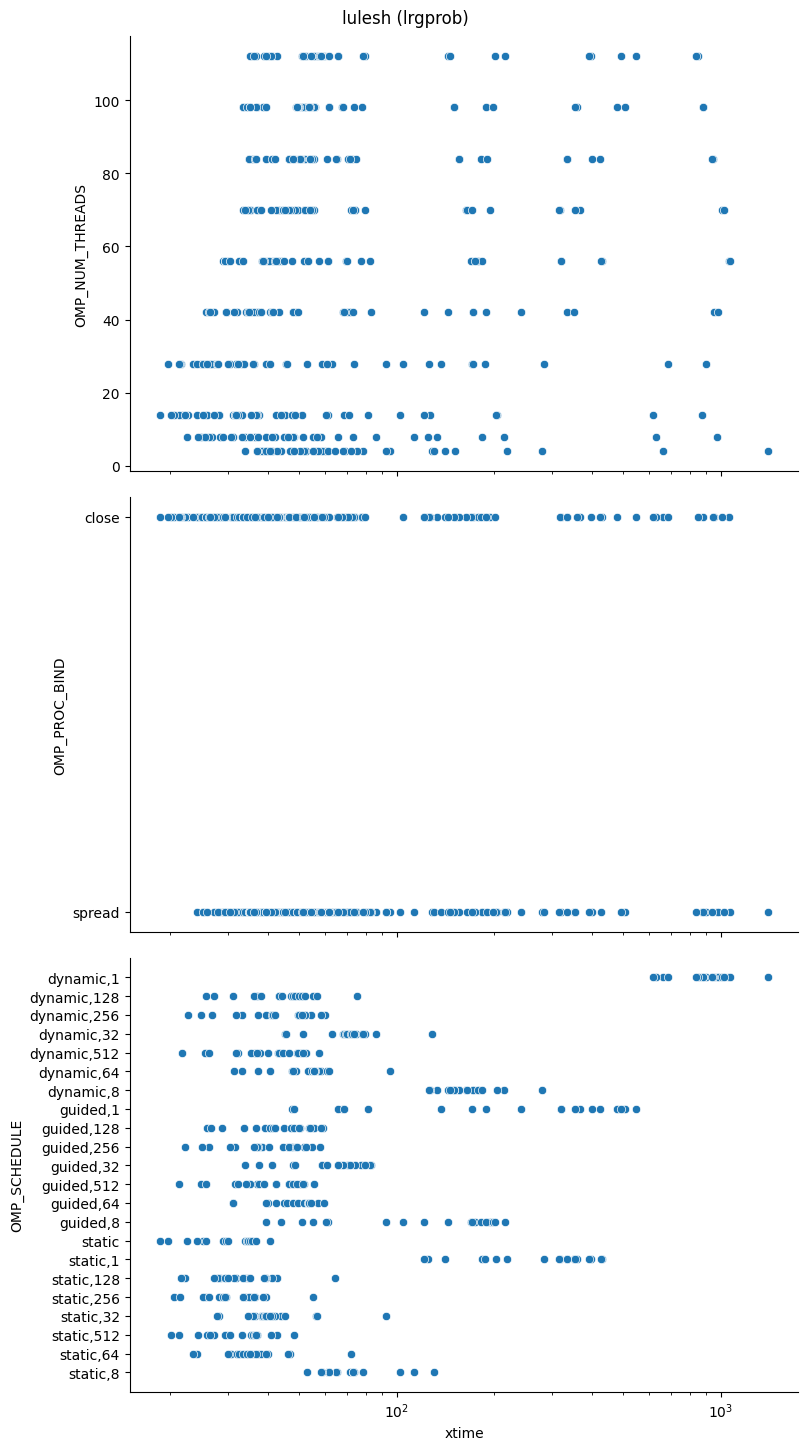

cfd_rodinia lrgprob
     OMP_NUM_THREADS OMP_PROC_BIND OMP_SCHEDULE     xtime
146               28         close       static  0.143510
102               14         close       static  0.150585
168               28        spread       static  0.170103
58                 8         close       static  0.186749
190               42         close       static  0.195084
234               56         close       static  0.197186
256               56        spread       static  0.197741
124               14        spread       static  0.197763
212               42        spread       static  0.201203
366               98         close       static  0.207802


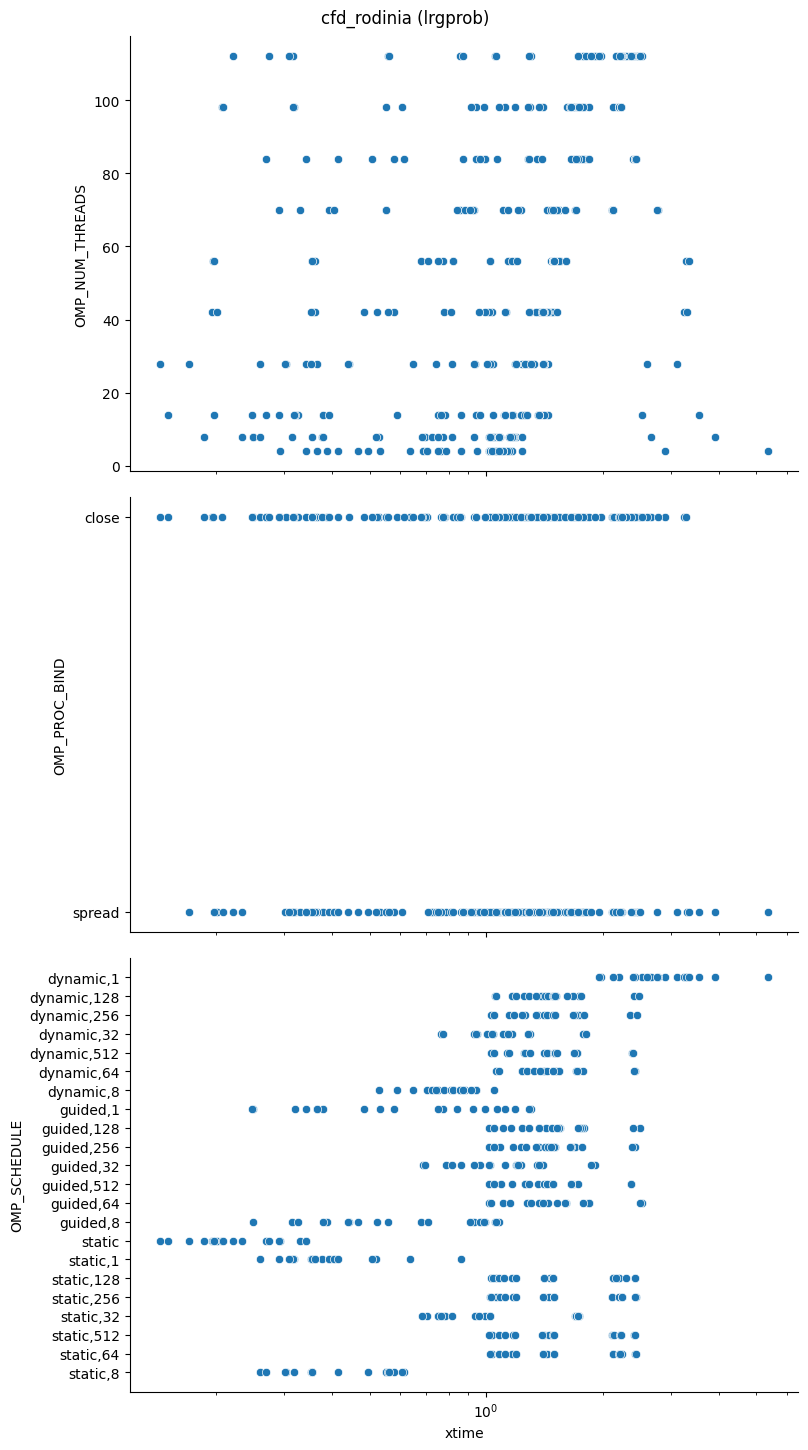

In [7]:
# for each complete run, let's plot the data

for key,values in doneRuns.items():
	progname = values['progname']
	probsize = values['probsize']
	df = values['df'].copy(deep=True)

	# drop any -1 values
	df = df[df['xtime'] != -1.0]

	# drop the progname and probsize columns
	df = df.drop(columns=['progname', 'probsize'])

	#print(df.head(), df.shape)

	hparams = list(df.columns)
	hparams.remove('xtime')

	# average out the xtimes
	avrgd = df.groupby(hparams).mean().reset_index()

	print(progname, probsize)
	# best xtime configs
	print(avrgd.sort_values(by=['xtime']).head(10))

	# let's create multiple 2D plots of the xtimes
	pp = sns.pairplot(avrgd, y_vars=hparams, x_vars=['xtime'])
	pp.fig.set_size_inches(15,15)
	pp.fig.suptitle(progname+' ('+probsize+')', x=0.7, y=0.999)

	for ax in pp.axes.flat:
		if ax.get_ylabel() in hparams:
			ax.set(xscale='log')

	plt.show()


	
	
